# (E07)7th_Project-Get_Nearest_Face
*********************************************************

## 1. 사진 모으기

### 1) 비교할 연예인 사진 모으기

      해당 이미지들은 변호윤님이 올려주신 이미지셋을 받아서 진행했습니다.
      (https://drive.google.com/file/d/1SCNlkW3l9bzsGhzFVk8DmNdfq9D-sey2/view?usp=sharing)
      압축을 풀고 이미지들을 확인해봅니다.

[(53, 311, 182, 182)]


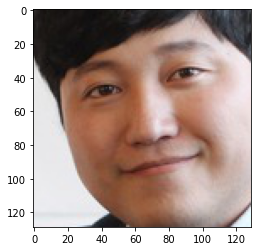

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/김대명.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

      아래 함수 get_cropped_face를 통해 이제 쉽게 크롭된 얼굴 이미지를 받아올 수 있습니다.

In [2]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        return []
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

### 2) 내 사진 찍기
    
      해당 과정에서 끔찍하게도 본인의 사진 두장을 요구하므로 순순히 요구사항에 따라줍니다.

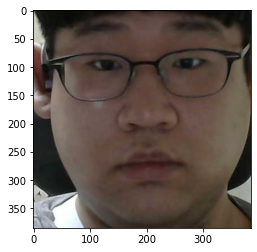

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/나1.png'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

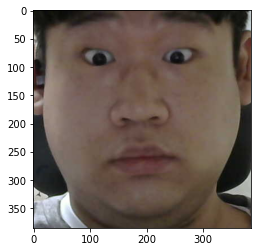

In [26]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/나2.png'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

      으악 내눈!

## 2. 얼굴 영역 임베딩 하기

      해당 과정을 진행하면서 배운 함수를 이용하여 임베딩을 추출하고 저장합니다.
      이미지들이 저장된 폴더를 불러와서 어떤 이미지들이 있는지 확인합니다.

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['김학범.jpg', '이진호.jpeg', '이근대위.jpeg', '제니.jpg', '케빈 스페이시.jpeg', '김민재.jpeg', '하현우.jpg', '기성용.jpg', '신태용.jpg', '이광수.jpg', '목진화.png', '정형돈.jpg', '레드벨벳웬디.jpg', '개코.jpeg', '김C.jpeg', '개리.jpg', '브래들리 쿠퍼.jpg', '이재용.jpg', '이제훈.jpeg', '윤균상.jpg', '조정치.jpg', '심수창.jpeg', '최현석.jpg', '김상호.png', '크리스탈.jpg', '우기.jpg', '솔라.jpg', '대도서관.jpeg', '지민(BTS).jpg', '최양락.jpg', '잇지예지.jpeg', '이희준.jpg', '최준석.jpg', '디오.jpeg', '전소미.jpg', '산들.jpeg', '클린트 이스트우드.jpg', '잇섭.png', '유리.jpg', '김대명.jpeg', '이성민.jpg', 'RM.jpg', '이천수.jpg', '길.jpg', '박진영.jpeg', '이경규.jpeg', '이안 굿펠로우.jpg', '김종서.jpg', 'clinton.jpeg', '공유.jpg', '잭 니콜슨.jpeg', '장도연.jpg', '제이콥 배털론.jpg', '이민호.jpeg', '손호준.jpeg', '박해일.jpeg', '신동엽.jpg', '저스틴 존슨.jpeg', '화사.jpg', '김고은.jpeg', '유재석.jpg', '크리스 에반스.jpg', '마크 러팔로.jpeg', '권현빈.jpg', '첸.jpg', '돈스파이크.jpg', '박성호.jpg', '강미나.jpg', '태양.jpeg', '채연.jpg', '서현진.jpg', '황병국.jpg', '백윤식.png', '유노윤호.jpg', '류승범.jpg', '세훈.jpg', '야마다 타카유키.jpeg', '이종석.jpeg', '뷔.png', '태연.jpg', '트와이스사나.jpg', '성시경.jpg', '로저 무어.jpeg', '조정석.jpg'

      임베딩을 진행 한 후 임베딩 안에 저장되어있는 값들을 확인해봅니다.

In [5]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126269,  0.11014768, -0.01082436, -0.05268788,  0.01033718,
        -0.00813816, -0.07251763, -0.0922645 ,  0.19304708, -0.09246373,
         0.23908535,  0.06770279, -0.22123131, -0.14119366,  0.05562147,
         0.13705502, -0.17924425, -0.07232318, -0.11183269, -0.1137081 ,
         0.03956441, -0.01019115,  0.09421787,  0.04493123, -0.12757549,
        -0.34449592, -0.05374937, -0.17703311,  0.0086822 , -0.09721596,
        -0.0981718 ,  0.00278224, -0.17721362, -0.12789804,  0.03489832,
        -0.01991243, -0.00838929, -0.00132872,  0.18308586,  0.02447556,
        -0.12376561,  0.09957034,  0.02323559,  0.22983313,  0.28385225,
         0.06655719, -0.00558919, -0.0983354 ,  0.10058986, -0.23476943,
         0.060063  ,  0.13415909,  0.08373024,  0.03900502,  0.1019453 ,
        -0.19337651,  0.01717638,  0.08978971, -0.16005102,  0.01892098,
         0.03082444, -0.0605129 , -0.04526768,  0.04633341,  0.20678672,
         0.10299793, -0.12437527, -0.04905149,  0.1

      이제 폴더 안의 모든 이미지 파일을 임베딩을 추출하고 딕셔너리에 저장합니다.
      만약 이미지를 크롭하는데 실패하면 빈 리스트를 리턴해줘서 NULL값을 리턴해 발생하는 오류를 방지해줍니다.

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

      임베딩 안에 들어가있는 이름을 불러와서 값이 들어가있는지 확인합니다.

In [28]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962461,  0.20268646,  0.0323635 ,  0.02439233, -0.06226433,
        0.0514071 ,  0.07351793, -0.16823342,  0.06962212, -0.05557969,
        0.17270111, -0.05094172, -0.35293111, -0.03164376,  0.03792981,
        0.1734385 , -0.13260117, -0.15357369, -0.23523541, -0.08442697,
       -0.00134133,  0.03210668, -0.08926147, -0.02670787, -0.09581173,
       -0.25792357, -0.01057008, -0.11071666,  0.03133569, -0.07444929,
        0.05670558, -0.02273803, -0.19461133, -0.04576058,  0.00947578,
        0.01806064, -0.15026242, -0.07787319,  0.17577602,  0.01933261,
       -0.19744579, -0.03930514,  0.07374467,  0.20196031,  0.14767544,
       -0.01415385,  0.01724756, -0.11976208,  0.09462965, -0.2431815 ,
       -0.02755117,  0.12169883,  0.148377  ,  0.17079775,  0.06952556,
       -0.15360464,  0.02005422,  0.08199161, -0.19544823,  0.10653654,
        0.11468483, -0.21902835, -0.07677593, -0.06791041,  0.10587607,
        0.05921577, -0.06115702, -0.11171094,  0.23917493, -0.15

      불러온 이미지들의 거리를 계산해주는 함수를 만들어줍니다.
      0일수록 비슷한 얼굴로 판별합니다.
      오바마와 트럼프의 이미지 벡터간 거리는 약 0.889입니다.

In [8]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117257487282

      이제 지정한 이미지를 다른 모든 이미지들과의 거리를 측정해주는 함수를 생성해줍니다.

In [9]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [10]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962461,  0.20268646,  0.0323635 ,  0.02439233, -0.06226433,
          0.0514071 ,  0.07351793, -0.16823342,  0.06962212, -0.05557969,
          0.17270111, -0.05094172, -0.35293111, -0.03164376,  0.03792981,
          0.1734385 , -0.13260117, -0.15357369, -0.23523541, -0.08442697,
         -0.00134133,  0.03210668, -0.08926147, -0.02670787, -0.09581173,
         -0.25792357, -0.01057008, -0.11071666,  0.03133569, -0.07444929,
          0.05670558, -0.02273803, -0.19461133, -0.04576058,  0.00947578,
          0.01806064, -0.15026242, -0.07787319,  0.17577602,  0.01933261,
         -0.19744579, -0.03930514,  0.07374467,  0.20196031,  0.14767544,
         -0.01415385,  0.01724756, -0.11976208,  0.09462965, -0.2431815 ,
         -0.02755117,  0.12169883,  0.148377  ,  0.17079775,  0.06952556,
         -0.15360464,  0.02005422,  0.08199161, -0.19544823,  0.10653654,
          0.11468483, -0.21902835, -0.07677593, -0.06791041,  0.10587607,
          0.05921577, -0.06

## 4. 비슷한 얼굴 찾기

      이제 가까운 얼굴을 찾는 함수를 작성해줍니다. 디폴트로 상위 5개를 보여줬는데 확인 차 10개까지 늘렸습니다.

In [11]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

      오바마와 가장 비슷한 사람을 찾으니 권태원님이 0.66으로 가장 가깝다고 나왔습니다.

In [12]:
get_nearest_face('obama')

순위 1 : 이름(권태원), 거리(0.6624370389825165)
순위 2 : 이름(김C), 거리(0.6974471216817059)
순위 3 : 이름(성룡), 거리(0.7058108813082398)
순위 4 : 이름(김연우), 거리(0.7156421182283262)
순위 5 : 이름(이정재), 거리(0.7166229066971841)
순위 6 : 이름(차두리), 거리(0.7174958433417761)
순위 7 : 이름(이경규), 거리(0.7179241192954529)
순위 8 : 이름(류승범), 거리(0.7247575340850337)
순위 9 : 이름(유재석), 거리(0.7253698562636339)
순위 10 : 이름(돈스파이크), 거리(0.7390101743082925)


      이제 본인의 사진으로 확인해봅니다. 본인의 사진들 간의 거리는 약 0.27로 나왔고 각각 이경규는 0.42, 배성재는 0.37로 상당히 가깝게 나왔습니다

In [13]:
get_nearest_face('나1')

순위 1 : 이름(나2), 거리(0.26929000965547256)
순위 2 : 이름(이경규), 거리(0.41989951154663346)
순위 3 : 이름(최양락), 거리(0.42228612523340553)
순위 4 : 이름(서장훈), 거리(0.4321440780702677)
순위 5 : 이름(김경진), 거리(0.4325302488162838)
순위 6 : 이름(박휘순), 거리(0.44332026367743904)
순위 7 : 이름(제이콥 배털론), 거리(0.44409164010105406)
순위 8 : 이름(배성재), 거리(0.4458686261048207)
순위 9 : 이름(개코), 거리(0.4488161280566371)
순위 10 : 이름(정준하), 거리(0.44895391467114665)


In [14]:
get_nearest_face('나2')

순위 1 : 이름(나1), 거리(0.26929000965547256)
순위 2 : 이름(배성재), 거리(0.3656691519171859)
순위 3 : 이름(개코), 거리(0.387889066697683)
순위 4 : 이름(안재홍), 거리(0.4123289606107761)
순위 5 : 이름(서장훈), 거리(0.4210350366852853)
순위 6 : 이름(이대호), 거리(0.4359565842597942)
순위 7 : 이름(손흥민), 거리(0.4419777100727309)
순위 8 : 이름(최양락), 거리(0.4501670652373997)
순위 9 : 이름(정준하), 거리(0.4505284973214312)
순위 10 : 이름(유해진), 거리(0.4535563351478523)


## 5. 재미있는 시각화

      뭘 할까 고민하다가 비슷한 두 얼굴을 합쳐서 보여주면 얼마나 가까운지 확인할 수 있을 것 같아서 진행해보았습니다.
      OpenCV모듈을 임포트해서 2번째 익스플로레이션에서 썻던 반투명 합성을 사용해봤습니다.
      
      아래 함수는 두 이미지를 받아와서 얼굴을 잘라 합성해줍니다.

In [23]:
import cv2

def get_nearest_combined_face(name1, name2):

    temp1 = cv2.resize(get_cropped_face(name1), (360, 360)) 
    temp2 = cv2.resize(get_cropped_face(name2), (360, 360)) 
    
    plt.imshow(temp1)
    plt.show()
    plt.imshow(temp2)
    plt.show()
    
    dst = cv2.addWeighted(temp1, 0.5, temp2 , 0.5, 0)

    plt.imshow(dst)
    plt.show()

      일단 오바마와 가장 가깝다고 나원 권태원님을 합성해봅니다.

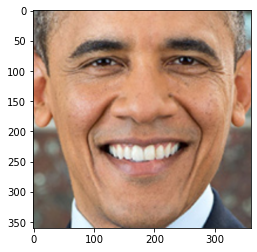

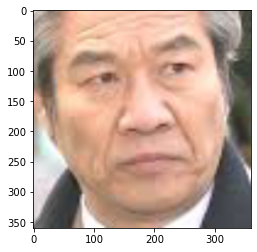

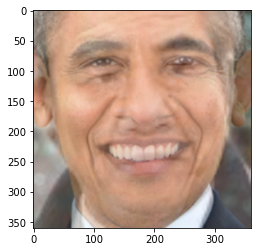

In [30]:
image1 = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image2 = os.getenv('HOME')+'/aiffel/face_embedding/images/권태원.jpeg'

get_nearest_combined_face(image1, image2)

      생각보다 비슷하게 나옵니다,
      
      이제 제 사진을 보자면....

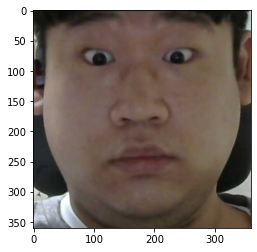

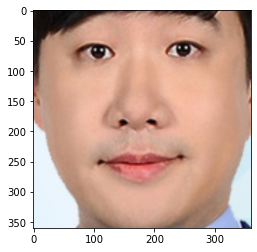

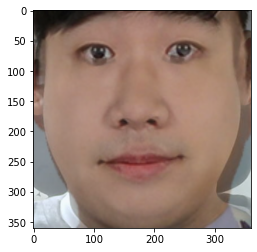

In [24]:
image1 = os.getenv('HOME')+'/aiffel/face_embedding/images/나2.png'
image2 = os.getenv('HOME')+'/aiffel/face_embedding/images/배성재.jpg'

get_nearest_combined_face(image1, image2)

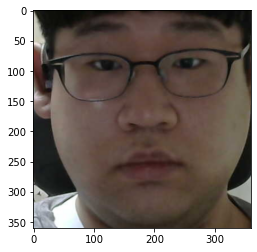

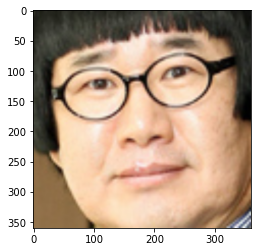

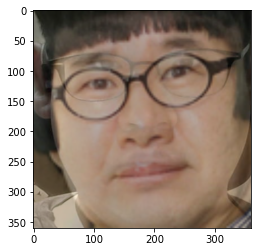

In [25]:
image1 = os.getenv('HOME')+'/aiffel/face_embedding/images/나1.png'
image2 = os.getenv('HOME')+'/aiffel/face_embedding/images/최양락.jpg'

get_nearest_combined_face(image1, image2)

      자세한 설명은 생략하겠습니다...............

*********************************
# 총평 및 결론

      해당 프로젝트 난이도는 다른 것과 비교해서 쉬운편에 속했지만 정신적 데미지가 너무 컸습니다.
      그래도 재밋는 경험을 한 것 같습니다.